# Aufgabenstellung

"Die Firma Little Startup ist in Deutschland sehr erfolgreich mit ihrem Geometry-Companion, eine mobile-App, die
Schüler:innen dabei hilft, mathematische Sachverhältnisse tiefer und lehrerkonform zu vertiefen. Die Firma denkt
nun darüber nach, die App auch in anderen Ländern anzubieten. 

Dafür will sie wissen, welches Land für ein solche
App geeignet wäre. Da die App vieles aus dem Internet bezieht, möchten die Kolleg:innen der Marketingabteilung
wissen, welches Land dafür bereit wäre. Die Einführung der App in einem anderen Land setzt sprachliche,
curriculare, sowie betriebliche Anpassungen voraus. Dafür ist es wichtig, dass auch in Deutschland normale
Kriterien wie die Internetbandbreite in diesem Land geprüft werden.

Es ist Deine Aufgabe herauszufinden, in welchem Land die höchste Zahl der Haushalte dazu in der Lage wären,
eine App zum Lernen zu nutzen.

Um die Menge von Haushalten zu ermitteln, die in den vergangenen Jahren einen Breitbandzugang nutzten, kann
der Datensatz Internet Access der OECD verwendet werden (siehe OECD Internet 2020)., sowie die Tabelle der
Haushaltsausgaben (siehe OECD Household spending 2020) und eventuell andere Informationen (etwa die Daten
aus Wikipedia oder WorldBank zur Bevölkerung oder Lokalisierung)."

# 1. Einleitung

Wie in der Aufgabenstellung zu dieser Fallstudie zu entnehmen ist ist die Firma Little Startup in Deutschland sehr erfolgreich mit einer mobile-App die Schüler:innen dabei hilft mathematische Sachverhältnisse zu vertiefen. Nun sollen weitere Märkte folgen. Dafür wird zunächst angenommen das sicher der Aufwand für eine Anpassung wie z.B. eine Lokaliserung nahezu erübrigt da die mobile-App bereits jetzt stark auf Visualsierung mittels Diagrammen, Piktogrammen, Symbolen, Idiogrammen und Ideogrammen setzt und dies auch ein Grund für den Erfolg der mobile-App ist.
Weit wichtiger für neue, potentielle Märkte die Faktoren:

    - Wie viele Haushalte haben einen Breitband-Internetzugang
    - Wie hoch sind die Haushaltausgaben
    
Neben diesen Hauptfaktoren, deren Entwicklung in den nächsten zwei Jahren spielt auch deren Zusammenhang in der Auswahl der Kandidaten eine entscheidene Rolle. Es existiert eine Wirkungsvermutung und die einseitig gerichtete Hypothese lautet: 
Je größer der Anteil an Haushalten mit Breitband-Internetzugang und höher die Haushaltsausgaben pro Einwohner:in in einem Land und je dichter sich der Zusammanhang dieser beiden Hauptfaktoren an dem von Deutschland befindet, desto erfolgreicher wird die mobile-App Geometry-Companion sein.

Schlussendlich werden 10 statistisch qualitativ begründete Märkte genannt, sowie ein Preisvorschlag in US$ für das Jahr 2021 und 2022. Dieser Preis basiert auf dem in Deutschland sehr gut angenommenen 12€ pro Jahr.
Im Folgenden wird die Auswahl der Kandidaten und die Preisermittlung näher erleutert. 

Umgesetz wurde dies unter Einsatz statistischer Hilfmittel, der Programmiersprache R und einem als Entwicklungsumgebung verwendeten Jupyter Notebook. Der Stil der folgenden Kapitel erinnert sich stark an das von Jupyter Notebooks verwendete Format und sollte ggf. Anpassungen, Experimente oder Erweiterungen vereinfachen sowie die einzelnen technischen Stufen nachvollziehbar machen. Kommentare im Code sind auch deshalb bewusst in englischer Sprache verfasst.

# 2. Hauptteil

## 2.1 Verwendete Bibliotheken

Für eine ansprechende Visualiserung wird die Bibliothek tidyverse verwendet. Die Bibliotheken httr und XML werden zum Herunterladen und Verarbeitung von Online-Datenquellen verwendet. Stringr wird zum suchen und ersetzen von Zeichen in Zeichenketten mit regulären Ausdrücken verwendet.

In [1]:
library(tidyverse)
library(httr)
library(XML)
library(stringr)

# Make plots larger 
options(jupyter.plot_scale=1)

── Attaching packages ────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# 2.2 Herunterladen relevanter Daten

Neben den von der OECD bereitgestellten Daten zu Ländern und Informationen zu jeweiligen Zugang zu Breitbandinternet und Haushaltausgaben wird auch eine Tabelle geladen die es ermöglicht die sog. Alpha-3 Ländercodes zu Ländernamen in englischer Sprache zu zuzuordnen. Diese Zuordnung wird durch das Zusammenführen von Tabellen umgesetzt. Zudem werden nur Datensätze älter oder gleich dem Jahr 2005 verwendet da jüngere Daten für den Breitband-Internetzugang nicht vorliegen.

In [2]:
# download datasets and store them in dataframes
df_internet_access <- read.csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.INTERNET.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en", header=TRUE)
df_household_spendings <- read.csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.HHEXP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en", header=TRUE)

#download table for alpha-3 to country name mapping
url <- "https://www.iban.com/country-codes"
r <- GET(url)
doc <- readHTMLTable(doc=content(r, "text"))
df_country_codes <- doc[[1]]
# rename column for merging
names(df_country_codes)[3] <- "LOCATION"
df_country_codes <- subset(df_country_codes, select=c(Country,LOCATION))

# merge dataframes for actual country names
df_internet_access <- merge(df_internet_access, df_country_codes,by=c("LOCATION"))
df_household_spendings <- merge(df_household_spendings, df_country_codes,by=c("LOCATION"))

df_internet_access <- subset(df_internet_access, TIME >= 2005)
df_household_spendings <- subset(df_household_spendings, TIME >= 2005)

In [3]:
# A look inside the table/dataframe
#head(df_internet_access)

In [4]:
# A look inside the table/dataframe
#head(df_household_spendings)

# 2.3 Visualisierung der Daten

## 2.3.1 Visualisierung der Breitband-Internetzugänge

...

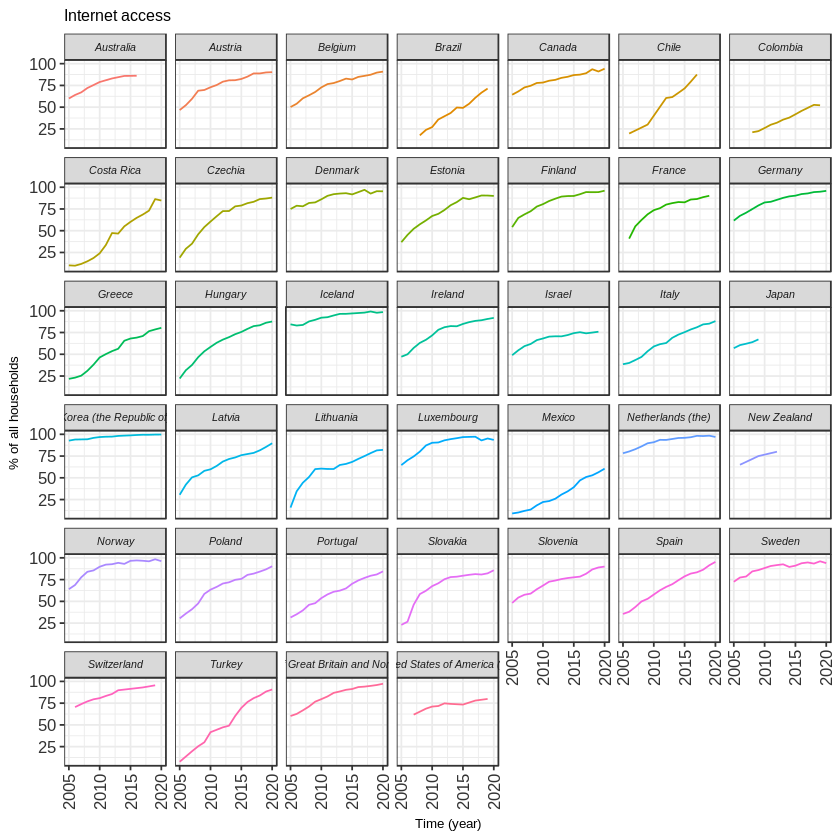

In [5]:
# filter out not usable rows
df_internet_access <- df_internet_access[lapply(df_internet_access,length)>0]

# plotting each country in one plot
ggplot(data = df_internet_access, mapping = aes(x = TIME, y = Value, color = Country)) +
    geom_line() +
    facet_wrap(vars(Country)) +
    labs(title = "Internet access",
        x = "Time (year)",
        y = "% of all households") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 10, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 10),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 8)) +
    theme(legend.position = "none")


## 2.3.2 Visualisierung der Haushaltsausgaben

... Maßnahmen, Gegenstand, ...

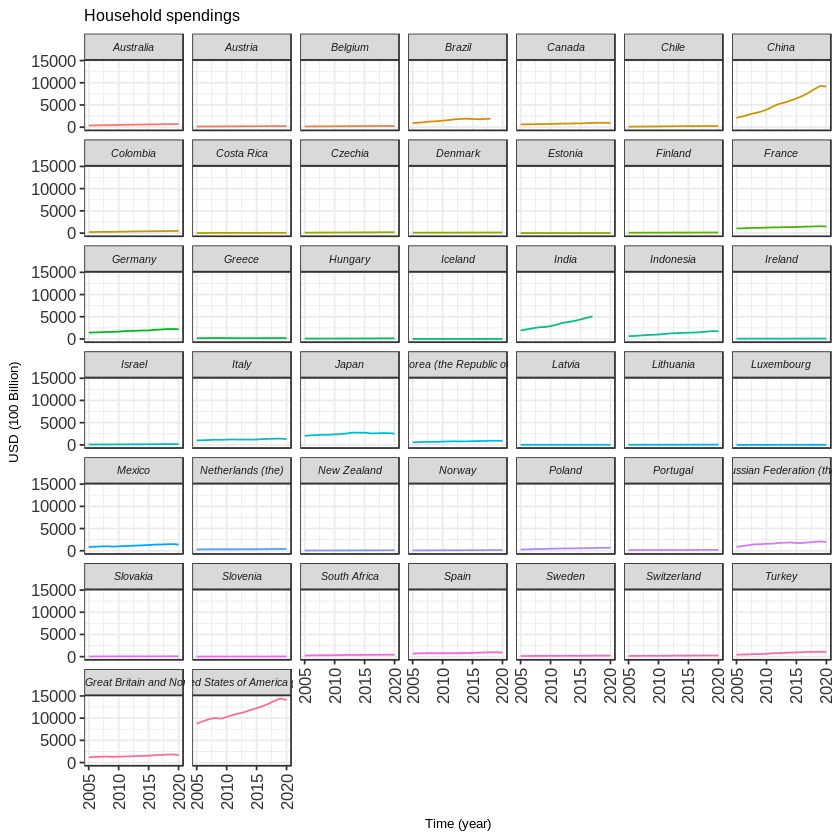

In [6]:
df_household_spendings <- df_household_spendings[lapply(df_household_spendings,length)>0]
df_household_spendings <- subset(df_household_spendings, MEASURE == 'MLN_USD')
df_household_spendings <- subset(df_household_spendings, SUBJECT == 'TOT')
df_household_spendings <- subset(df_household_spendings, TIME >= 2005)
df_household_spendings <- subset(df_household_spendings, LOCATION != 'EU' & LOCATION != 'EA')

df_household_spendings$Value <- df_household_spendings$Value/1000 # 100 Billion USD

ggplot(data = df_household_spendings, mapping = aes(x = TIME, y = Value, color = Country)) +
    geom_line() +
    facet_wrap(vars(Country)) +
    labs(title = "Household spendings",
        x = "Time (year)",
        y = "USD (100 Billion)") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 10, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 10),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 8)) +
    theme(legend.position = "none")

# 2.4 Normalisieren der Haushaltsausgaben pro Einwohner:in

Für eine Visualiserung sowie für eine spätere Verwendung der Daten zu den Haushaltsausgaben werden diese normalisiert. Die von der OECD zur Verfügung gestellten Daten enthalten die Haushaltsausgaben als Gesamtwert in Millionen US$. Wikipedia stellt Daten zu Bevölkerungsgröße des jweiligen Landes, sowie die für eine Normaliserung der Haushaltsausgaben pro Einwohner:in benötigte Anzahl der Haushalte. 
Durch die Vereinigung dieser beiden Tabellen werden dann anschließend die Werte für die pro Haushalt und pro Einwohner:in Ausgaben berechnet und als neue Spalten der zuvor Vereinigten Tabelle hinzugefügt.

In [7]:
# Download a table with Population and Household data per country
url <- "https://en.wikipedia.org/wiki/List_of_countries_by_number_of_households"
r <- GET(url)
doc <- readHTMLTable(doc=content(r, "text"))
df_household_numbers <- doc[[2]]

#Rename coulmns to make merging easier
df_household_numbers <- setNames(df_household_numbers, c("Country", "Continent", "Current Population", "NumberInHousehold", 
                                    "Households", "1Member", "2_3Members", "4_5Members", "6Members", "TIME"))

#Clean Time String
df_household_numbers$TIME <- str_replace_all(df_household_numbers$TIME, "\\[2\\]", "")
#Convert Time string to integer 
df_household_numbers$TIME <- as.integer(df_household_numbers$TIME) 
#Remove Not Available Data from Set
df_household_numbers <- na.omit(df_household_numbers)
#Remove Whitespace from Country Names (for merging)
df_household_numbers$Country <- sub("\\W+", "", df_household_numbers$Country)

df_household_numbers <- merge(df_household_numbers, df_country_codes,by="Country")

#Refresh Household Spendings Dataset for Jupyter Cell
df_household_spendings <- read.csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.HHEXP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en", header=TRUE)
df_household_spendings.mlnusd <- subset(df_household_spendings, MEASURE == 'MLN_USD')
df_household_spendings.mlnusd <- na.omit(df_household_spendings.mlnusd)

#df_spending_per_household <- merge(df_household_numbers, df_household_spendings.mlnusd, by=c("LOCATION", "TIME"))
df_spending_per_household <- merge(df_household_numbers, df_household_spendings.mlnusd, by=c("LOCATION"))

#Prepare String for converting
df_spending_per_household$Households <- str_replace_all(df_spending_per_household$Households, ",", "")
#Convert it to double to do later some calcualtion with it
df_spending_per_household$Households <- as.double(df_spending_per_household$Households)

#Prepare String for converting
df_spending_per_household$NumberInHousehold <- str_replace_all(df_spending_per_household$NumberInHousehold, ",", ".")
#Convert it to double to do later some calcualtion with it
df_spending_per_household$NumberInHousehold <- as.double(df_spending_per_household$NumberInHousehold)

#Calclulate and Add a new Column with Household Spendings to DataFrame
df_spending_per_household$HouseholdSpending <- with(df_spending_per_household, 
                                                    df_spending_per_household$Value*1000000/df_spending_per_household$Households)

#Calclulate and Add a new Column with Per Person Spendings to DataFrame
df_spending_per_household$PerPersonSpending <- with(df_spending_per_household, 
                                                    df_spending_per_household$HouseholdSpending / df_spending_per_household$NumberInHousehold)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


# 2.5 Prognose der Haushaltsausgaben pro Einwohner:in für die kommenden zwei Jahre

Für die Prognose der Haushaltsausgaben pro Einwohner:in für die kommenden zwei Jahre wird eine lineare Regression durchgeführt. Hierfür wird die lm()-Funktion verwendet und es wird ein Model definiert mit dem Namen „model“. Diese multiple lineare Regressionsanalyse hat das Ziel die Haushaltausgaben (abhängige Variable) mittels der Zeit und Land/Ort (unabhängigen Variablen) zu erklären. Die Ergebnisse des Modells werden interpretiert und bewertet bzw. gefiltert.

## 2.5.1 F-Statistik
F-statistic: 453.7 on 35 and 1408 DF,  p-value: < 2.2e-16
Die Signifikanz (p-Wert) ist mit 2,2e-16 sehr klein. Das Modell leistet in diesem Falle einen signifikanten Erklärungsbeitrag und es kann mit der Interpretation der weiteren Ergebnisse fortgefahren werden.

## 2.5.2 Güte des Regressionsmodells
Multiple R-squared:  0.9186,	Adjusted R-squared:  0.9165
Die Güte des Modells der Regression wird mit dem Bestimmtheitsmaß R-Quadrat (R²) angegeben. R² gibt an, wie viel Prozent der Varianz der abhängigen Variable (hier: Haushaltsausgaben) erklärt werden. Ein höherer Wert  ist hierbei besser. Das Modell erklärt 91,86% der Varianz, da das (Multiple R-squared) R²=0.9186 ist. Das korrigierte R² (Adjusted R-squared) adjustiert für eine automatische und ungewollte Zunahme des R².

## 2.5.3 Signifikanz der Koeffizienten
Der jeweilige Regressionskoeffizient sollte signifikant (p<0,05) sein. Die Signifikanzcodes geben an wie viel der Koeffizient einen Einfluss auf die Haushaltsausgaben hat. Ein Signifikanzniveau von 0,05 bedeutet dass die Wahrscheinlichkeit, dass der Koeffizient gleich 0 ist und somit nicht signifikant ist, weniger als 0,5 % beträgt. Dieses Niveau wird auch zur Filterung für die späteren Prognossen verwendet. Deutschland ("DEU") wird hier bewusst von der Filterung ausgenommen da es sich hier um unseren Referenzmarkt handelt.


Call:
lm(formula = PerPersonSpending ~ TIME.y + LOCATION, data = df_spending_per_household)

Residuals:
    Min      1Q  Median      3Q     Max 
-6759.0 -1121.1  -318.1   922.6 10497.7 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -8.705e+05  8.021e+03 -108.522  < 2e-16 ***
TIME.y       4.419e+02  4.018e+00  109.974  < 2e-16 ***
LOCATIONAUT  1.464e+03  3.976e+02    3.683 0.000239 ***
LOCATIONBEL  3.752e+01  3.976e+02    0.094 0.924830    
LOCATIONBRA -1.056e+04  4.991e+02  -21.154  < 2e-16 ***
LOCATIONCAN  2.552e+02  3.976e+02    0.642 0.521073    
LOCATIONCHE  4.148e+03  3.976e+02   10.433  < 2e-16 ***
LOCATIONCHL -8.828e+03  4.803e+02  -18.382  < 2e-16 ***
LOCATIONCHN -1.319e+04  4.590e+02  -28.730  < 2e-16 ***
LOCATIONCOL -1.098e+04  4.864e+02  -22.565  < 2e-16 ***
LOCATIONCRI -9.123e+03  4.639e+02  -19.667  < 2e-16 ***
LOCATIONDEU  1.917e+03  3.976e+02    4.822 1.58e-06 ***
LOCATIONESP -1.606e+03  3.976e+02   -4.039 5.66e-05 ***
LOCATIONEST -7

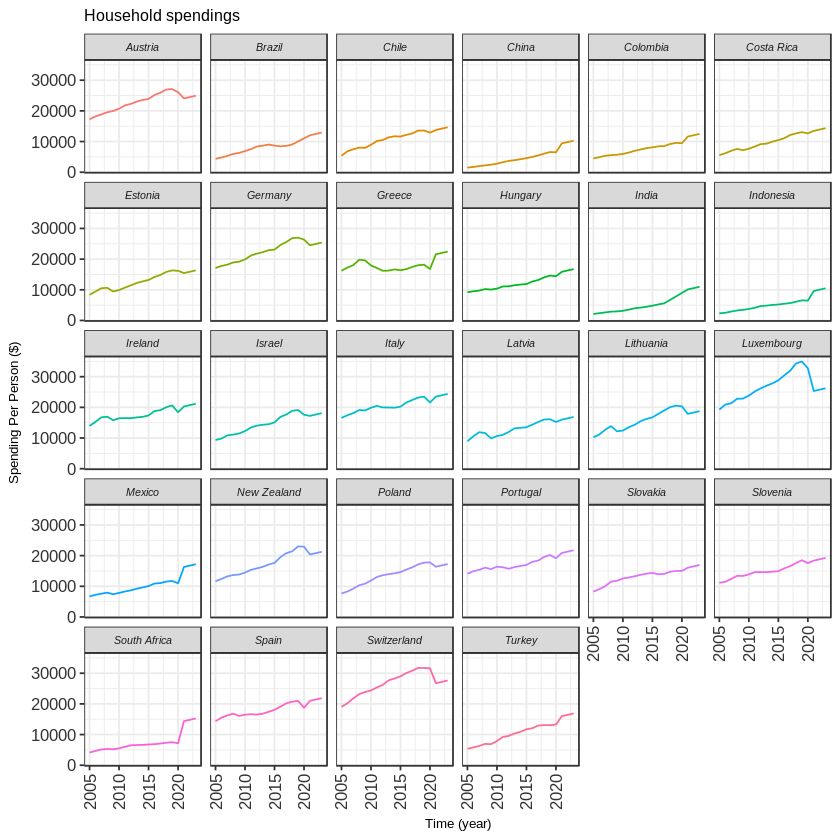

In [8]:
# Create a linear regression model 
model = lm(PerPersonSpending ~ TIME.y + LOCATION, data = df_spending_per_household) #Create the linear regression

# Review the results
summary(model) 

# Use summary to filter out only significants locations(according to Pr(>|t|)) 
df_sig <- as.data.frame(summary(model)$coefficients[,])
df_sig <- cbind(newColName = rownames(df_sig), df_sig)
rownames(df_sig) <- 1:nrow(df_sig)
# rename column for merging
names(df_sig)[1] <- "LOCATION"
df_sig$LOCATION <- str_replace_all(df_sig$LOCATION, "LOCATION", "")
df_sig <- merge(df_sig, df_spending_per_household, by=c("LOCATION"))
df_sig <- df_sig[df_sig$'Pr(>|t|)' < 0.05 | df_sig$LOCATION == "DEU", ]

# Get only neccessary columns for further processing
df_hs <- df_sig[c("LOCATION", "Country", "TIME.y", "PerPersonSpending")]

# To avoid duplicates
LOCATION <- unique(df_hs$LOCATION, incomparables = FALSE)

# Create a empty row/data set for all locations and 2021
df_2021 <- data.frame(LOCATION, Country='', TIME.y=2021, PerPersonSpending='')
# Predict Per Person Spendings for 2021
df_2021$PerPersonSpending <- predict(model, df_2021)
# Append it to the data frame
df_hs <- rbind(df_hs, df_2021)

# Create a empty row/data set for all locations and 2022
df_2022 <- data.frame(LOCATION, Country='', TIME.y=2022, PerPersonSpending='')
# Predict Per Person Spendings for 2022
df_2022$PerPersonSpending <- predict(model, df_2022)
# Append it to the data frame
df_hs <- rbind(df_hs, df_2022)

# Create a empty row/data set for all locations and 2023
df_2023 <- data.frame(LOCATION, Country='', TIME.y=2023, PerPersonSpending='')
# Predict Per Person Spendings for 2023
df_2023$PerPersonSpending <- predict(model, df_2023)
# Append it to the data frame
df_hs <- rbind(df_hs, df_2023)

# Merge with Country Codes to Map Alpha-3 to Country
df_hs <- merge(df_hs, df_country_codes,by=c("LOCATION"))

# Only data >= 2005 are interessting
df_hs <- subset(df_hs, TIME.y >= 2005)

ggplot(data = df_hs, mapping = aes(x = TIME.y, y = PerPersonSpending, color = Country.y)) +
    geom_line() +
    facet_wrap(vars(Country.y)) +
    labs(title = "Household spendings",
        x = "Time (year)",
        y = "Spending Per Person ($)") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 10, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 10),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 8)) +
    theme(legend.position = "none")

# 2.6 Prognose der Breitband-Internetzugänge für die kommenden zwei Jahre

Für die Prognose der Breitband-Internetzugänge für die kommenden zwei Jahre wird eine lineare Regression durchgeführt. Hierfür wird die lm()-Funktion verwendet und es wird ein Model definiert mit dem Namen „model“. Diese multiple lineare Regressionsanalyse hat das Ziel die Breitband-Internetzugänge (abhängige Variable) mittels der Zeit und Land/Ort (unabhängigen Variablen) zu erklären. Die Ergebnisse des Modells werden interpretiert und bewertet bzw. gefiltert. Zudem werden vorhergesagte Werte für den prozentuallen Anteil der Haushalte auf 100% korregiert falls diese diesen Wert überschreiten.

## 2.6.1 F-Statistik
F-statistic: 113.9 on 39 and 516 DF,  p-value: < 2.2e-16
Die Signifikanz (p-Wert) ist mit 2,2e-16 sehr klein. Das Modell leistet in diesem Falle einen signifikanten Erklärungsbeitrag und es kann mit der Interpretation der weiteren Ergebnisse fortgefahren werden.

## 2.6.2 Güte des Regressionsmodells
Multiple R-squared:  0.8959,	Adjusted R-squared:  0.8881 
Die Güte des Modells der Regression wird mit dem Bestimmtheitsmaß R-Quadrat (R²) angegeben. R² gibt an, wie viel Prozent der Varianz der abhängigen Variable (hier: Haushaltsausgaben) erklärt werden. R² nimmt einen Wert zwischen 0 und 1 an und ein höherer Wert ist hierbei besser. Das Modell erklärt 89,59% der Varianz, da das (Multiple R-squared) R²=0.8959 ist. Das korrigierte R² (Adjusted R-squared) adjustiert für eine automatische und ungewollte Zunahme des R². 

## 2.6.3 Signifikanz der Koeffizienten
Der jeweilige Regressionskoeffizient sollte signifikant (p<0,05) sein. Die Signifikanzcodes geben an wie viel der Koeffizient einen Einfluss auf die Haushaltsausgaben hat. Ein Signifikanzniveau von 0,05 bedeutet dass die Wahrscheinlichkeit, dass der Koeffizient gleich 0 ist und somit nicht signifikant ist, weniger als 0,5 % beträgt. Dieses Niveau wird auch zur Filterung für die späteren Prognossen verwendet. Deutschland ("DEU") wird hier bewusst von der Filterung ausgenommen da es sich hier um unseren Referenzmarkt handelt.


Call:
lm(formula = Value ~ TIME + LOCATION, data = df_internet_access)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.936  -3.631   1.156   4.639  22.957 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.807e+03  1.362e+02 -42.651  < 2e-16 ***
TIME         2.927e+00  6.774e-02  43.207  < 2e-16 ***
LOCATIONAUT -6.915e+00  3.094e+00  -2.235 0.025868 *  
LOCATIONBEL -7.314e+00  3.094e+00  -2.363 0.018474 *  
LOCATIONBRA -4.068e+01  3.266e+00 -12.458  < 2e-16 ***
LOCATIONCAN -8.947e-01  3.094e+00  -0.289 0.772587    
LOCATIONCHE  3.973e+00  3.317e+00   1.198 0.231545    
LOCATIONCHL -2.380e+01  3.572e+00  -6.663 6.91e-11 ***
LOCATIONCOL -4.851e+01  3.323e+00 -14.599  < 2e-16 ***
LOCATIONCRI -3.831e+01  3.094e+00 -12.379  < 2e-16 ***
LOCATIONCZE -1.772e+01  3.094e+00  -5.728 1.73e-08 ***
LOCATIONDEU  1.220e+00  3.094e+00   0.394 0.693673    
LOCATIONDNK  5.873e+00  3.094e+00   1.898 0.058263 .  
LOCATIONESP -1.590e+01  3.094e+00  -5.137 3.96e-0

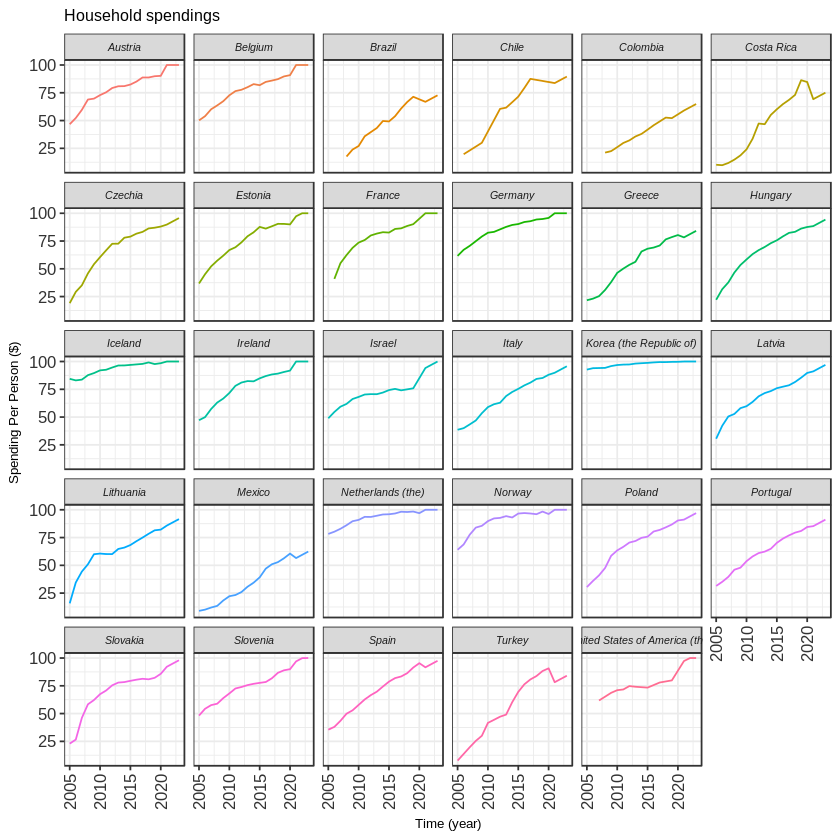

In [9]:
# Create a linear regression model 
model = lm(Value ~ TIME + LOCATION, data = df_internet_access) 

# Review the results
summary(model)

# Use summary to filter out only significants locations(according to Pr(>|t|)) 
df_sig <- as.data.frame(summary(model)$coefficients[,])
df_sig <- cbind(newColName = rownames(df_sig), df_sig)
rownames(df_sig) <- 1:nrow(df_sig)
# rename column for merging
names(df_sig)[1] <- "LOCATION"
df_sig$LOCATION <- str_replace_all(df_sig$LOCATION, "LOCATION", "")
df_sig <- merge(df_sig, df_internet_access, by=c("LOCATION"))
df_sig <- df_sig[df_sig$'Pr(>|t|)' <= 0.05 | df_sig$LOCATION == "DEU", ]
#df_sig

# Get only neccessary columns for further processing
df_ia <- df_sig[c("LOCATION", "Country", "TIME", "Value")]

# To avoid duplicates
LOCATION <- unique(df_ia$LOCATION, incomparables = FALSE)

# Create a empty row/data set for all locations and 2021
df_ia2021 <- data.frame(LOCATION, Country='', TIME=2021, Value='')
# Predict Internet Access for 2021
df_ia2021$Value <- predict(model, df_ia2021)
# Append it to the data frame
df_ia <- rbind(df_ia, df_ia2021)

# Create a empty row/data set for all locations and 2022
df_ia2022 <- data.frame(LOCATION, Country='', TIME=2022, Value='')
# Predict Internet Access for 2022
df_ia2022$Value <- predict(model, df_ia2022)
# Append it to the data frame
df_ia <- rbind(df_ia, df_ia2022)

# Create a empty row/data set for all locations and 2023
df_ia2023 <- data.frame(LOCATION, Country='', TIME=2023, Value='')
# Predict Internet Access for 2022
df_ia2023$Value <- predict(model, df_ia2023)
# Append it to the data frame
df_ia <- rbind(df_ia, df_ia2023)

# Correct values to max. possible 100% 
df_ia$Value <- ifelse(df_ia$Value > 100.0, 100.0, df_ia$Value)

# Merge with Country Codes to Map Alpha-3 to Country
df_ia <- merge(df_ia, df_country_codes,by=c("LOCATION"))

# Only data with Year/TIME >= 2005 are interessting
df_ia <- subset(df_ia, TIME >= 2005)

ggplot(data = df_ia, mapping = aes(x = TIME, y = Value, color = Country.y)) +
    geom_line() +
    facet_wrap(vars(Country.y)) +
    labs(title = "Household spendings",
        x = "Time (year)",
        y = "Spending Per Person ($)") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 10, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 10),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 8)) +
    theme(legend.position = "none")


# 2.6 Zusammenhang und Bewertung der Haushaltsausgaben pro Einwohner:in und dem prozentuallen Anteil der Haushalte die über einen Breitband-Internetzugang verfügen

FÜr die Haushaltsausgaben pro Einwohner:in und für den prozentuallen Anteil der Haushalte mit einem Breitband-Internetzugang exitieren nun prognostizierte Werte für die kommenden zwei Jahre. Diese Werte wurden den jeweiligen Tabellen hinzugefügt. Hinzugefügt wurden Werte die zuvor als Signifikant eingestuft worden sind. Die in der Einleitung aufgestellte Hypothese das 

,LOCATION,CORR
,<fct>,<dbl>
6,DEU,0.9295075


,LOCATION,CORR
,<fct>,<dbl>
19,SVK,0.9827878
4,COL,0.9824457
20,SVN,0.9805238
17,POL,0.9798766
3,CHL,0.9725334
5,CRI,0.9552439
13,ITA,0.9472785
18,PRT,0.9319669
6,DEU,0.9295075


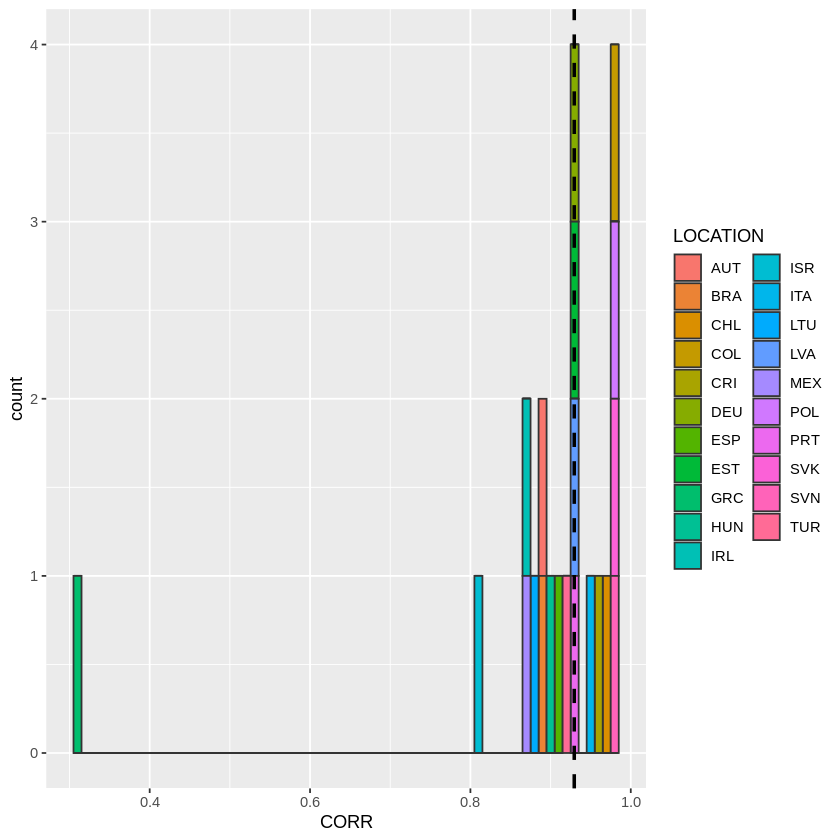

In [10]:
# Rename column for merging
names(df_hs)[3] <- "TIME"

# Merge Household Spendings and Internet Access to prepare correcelations
df <- merge(df_hs, df_ia,by=c("LOCATION","TIME"))

# Group Values with Locations
xx <- data.frame(group = df$LOCATION, a = df$PerPersonSpending , b = df$Value )

# Perform Correlation for each country on a certain time span
result <- by(xx[,2:3], xx$group, function(x) {cor(x$a, x$b)})

# Coerce it into a data frame via a matrix
result.dataframe <- as.data.frame(as.matrix(result))

# Remove not usable/available rows
result.dataframe <- na.omit(result.dataframe)

# Beautify column names
result.dataframe <- cbind(newColName = rownames(result.dataframe), result.dataframe)
rownames(result.dataframe) <- 1:nrow(result.dataframe)
colnames(result.dataframe) <- c("LOCATION","CORR")

# Sort/Order the data set with decreasing correlation numbers
result.dataframe <- result.dataframe[order(result.dataframe$CORR,decreasing=TRUE), ]

# We pick germany as a reference
germany <- result.dataframe[result.dataframe$LOCATION == 'DEU', ]
View(germany)
View(result.dataframe)
ggplot(aes(x = CORR ), data = result.dataframe) + 
  geom_histogram(aes(fill = LOCATION ), binwidth=0.01, colour="grey20") +
  geom_vline(aes(xintercept=germany$CORR), color="black", linetype="dashed", size=1)

## correlation coefficients for a set of variables used to determine if a relationship exists between the variables. The coefficient indicates both the strength of the relationship as well as the direction (positive vs. negative correlations)

In [11]:
df_germany <- subset(df_hs, LOCATION == 'DEU' & TIME == 2021)

# Get the current exchange rate Euro/US Dollar
url <- "https://www.xe.com/currencyconverter/convert/?Amount=1&From=EUR&To=USD"
r <- GET(url)
doc <- readHTMLTable(doc=content(r, "text"))
xe <- doc[[1]]
xe <- xe[1,]

# Clean the string 
xe.dollar <- str_replace_all(xe$USD, "USD", "")
# Convert the string to double for further calculations
xe.dollar <- as.double(xe.dollar)

# German App price = 12 Euro
app.price.eur <- 12
# App Price in Dollar
app.price.dollar <- app.price.eur * xe.dollar
# Calculate the Percentage of the App Price from the per person household spendings
app.percentage.spending <- (app.price.dollar)/(df_germany$PerPersonSpending)

cat("Precentage of German Per Person Houshold Spending for App:", app.percentage.spending)

Precentage of German Per Person Houshold Spending for App: 0.0005545715

,Country,Year,AppPrice
,<fct>,<dbl>,<dbl>
283,Latvia,2022,9.114247
327,Portugal,2022,11.821150
137,Estonia,2022,8.813301
389,Turkey,2022,9.123053
130,Spain,2022,11.884519
227,Italy,2022,13.284998
78,Costa Rica,2022,7.715549
185,Hungary,2022,9.045448
22,Brazil,2022,6.919637


Final Price Suggestion for 2022 and 2023 in USD: 9.24

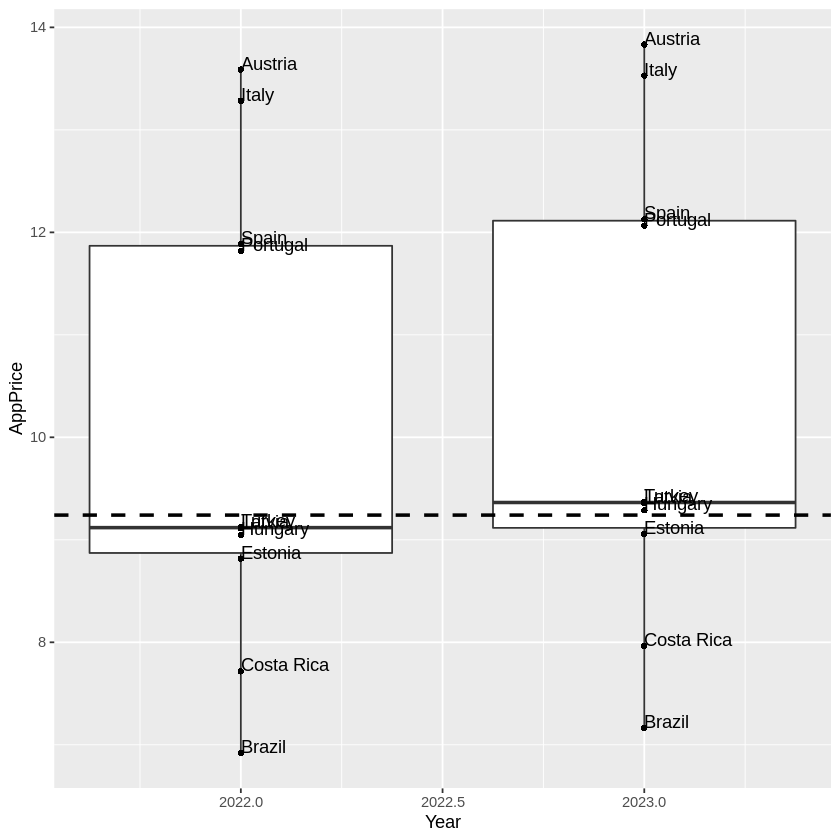

In [12]:
df_final <- merge(result.dataframe, df_hs, by=c("LOCATION"))

# Filter out similar (to Germany) Markets. Similarity in this case: Correlation close to Germany
df_final$Dist <- with(df_final, abs(df_final$CORR-germany$CORR))

# For all country candidates calcualte it's price in dollar
df_final$AppPrice <- with(df_final, df_final$PerPersonSpending*app.percentage.spending )

# Create Subset for 2022 
df_2022 <- subset(df_final, TIME == 2022)
# Order it (ascending)
df_2022 <- df_2022[order(df_2022$Dist), ]
# Get top 10 (closest/nearest matches)
df_2022 <- df_2022[2:11, ]

# Create Subset for 2023 
df_2023 <- subset(df_final, TIME == 2023)
# Order it (ascending)
df_2023 <- df_2023[order(df_2023$Dist), ]
# Get top 10 (closest/nearest matches)
df_2023 <- df_2023[2:11, ]

df_final <- rbind(df_2022, df_2023)
df_final <- df_final[c("Country.y","TIME", "AppPrice")]
df_final <- setNames(df_final, c("Country", "Year", "AppPrice"))
View(df_final)

g <- ggplot(df_final, aes(group=Year, y=AppPrice, x=Year)) + 
  geom_boxplot() + 
  geom_jitter(shape=16, position=position_jitter(0.0)) +
  geom_text(aes(label=Country),hjust=0, vjust=0) 
# Get Boxplot statistics to get middle value (prices for 2022 and 2023)
boxplot_stats <- layer_data(g)
# Draw a dashed line for mean(2022,2023). This is our final price suggestion!
g <- g + geom_hline(aes(yintercept=mean(boxplot_stats$middle)), color="black", linetype="dashed", size=1)
g
cat("Final Price Suggestion for 2022 and 2023 in USD:", round(mean(boxplot_stats$middle),2))

# Sonstiges/Notizen

Statistiken/Daten:
https://data.oecd.org/ict/internet-access.htm
https://data.oecd.org/hha/household-spending.htm
https://data.oecd.org/broadband/households-with-broadband-access.htm
https://data.oecd.org/eduresource/private-spending-on-education.htm
https://data.oecd.org/eduresource/public-spending-on-education.htm
https://en.wikipedia.org/wiki/List_of_countries_by_number_of_households

Korrelationsmatrix um Märkte zu identifizieren die Deutschland ähnlich sind:

U.a. Normalisierung undabhängiger Variablen (5.)
https://towardsdatascience.com/7-steps-to-run-a-linear-regression-analysis-using-r-d5897a66b835

Linear Regression Model Accurancy
http://www.sthda.com/english/articles/40-regression-analysis/167-simple-linear-regression-in-r/

Correlation Matrix
https://www.displayr.com/how-to-create-a-correlation-matrix-in-r/

Idee 1 - vergleichbare Märkte finden:
Deutschland als Erfolgreicher Mark etabliert, ähnliche Märkte sollen gefunden werden.
Zunächst werden die Faktoren, Parameter bestimmt die für Erfolg/Nicht Erfolg verantwortlich sind.
Faktoren: Internetzugriff, Bildungsausgaben, usw -> Korrelationsmatrix (3D) mit Deutschland als Mittelwert 
                                                                                   andere Länder werden damit verglichen (Varianzanalyse)
                                                                                   wenn Werte zu 95% darin liegen (Nullhypothese, Konfidenzintervall)
Ergebnis: Liste mit 10 Kandidaten (Varianz(-bereich))

Idee 2 - Preisberechnung:
Ausgehen vom Preis in Deutschland von 12€/a wird der Anteil der Haushaltsausgaben in Prozent berechnet:
PercentageApp = AppPrice/((Houshold spendings*ExchangeFactor$€)/(Houshold number))
-> 0,00025%
Für alle 10 Kandidaten nun  AppPrice=0,00025%*(Houshold spendings)